In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 电费部分，提供方为con edison

In [25]:
# 过去13次账单的情况
usage = [236,541,409,200,186,581,407,422,203,319,391,337,229]
prices = [71.53,144.03,105.88,63.20,61.7,147.69,104.78,113.45,74.91,98.31,114,98.79,74.22]

usage = np.array(usage)
prices = np.array(prices)

In [24]:
np.mean(usage)

343.15384615384613

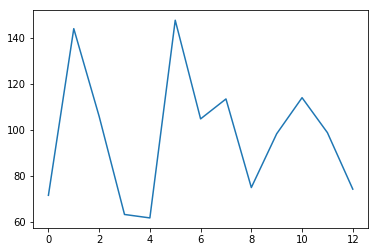

In [23]:
plt.plot(np.arange(len(usage)),prices)

Text(0,0.5,'cost')

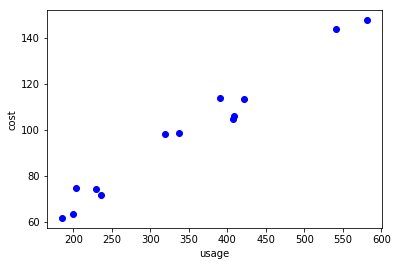

In [4]:
plt.plot(usage,prices,'bo')
plt.xlabel("usage")
plt.ylabel("cost")

### 很明显的具有线性的特征，其中，查询账单可知，里面存在针对电的basic service charge,主要包括电力基本系统、电表服务等，这一部分为固定开支，也就是哪怕完全不消耗电，也会有的部分，可以认为是截距部分

In [8]:
reg = LinearRegression().fit(usage.reshape(-1,1),prices)

In [9]:
reg.coef_,reg.intercept_

(array([0.21383089]), 24.506954183239728)

In [10]:
reg.score(usage.reshape(-1,1),prices)

0.9731492749034757

# 电费部分总结

由此可知，电力的开支中，每度电的费用为21.38cent，查询账单可以知道，里面含supply和delivery，其中delivery占据多数
每个月的固定开支为24.51元

# 电的使用部分
电的使用按道理应该存在明显的季节性，即夏季因为AC偏多，但实际上，并没有在使用记录中看到明显的季节效应，电的使用量有明显的随机性，具体下来，家里明显消耗电的部分为
1. 常年维持部分：冰箱，这个是一个电力主要消耗品
2. 使用部分: 电灯、电子设备、微波炉、热水壶
3. 热水器：这个是一个不太好调查的地方，在美国，热水器是常年维持热水随时available的状况，所以大量能源属于维持部分，但同时个人也会使用

# gas部分

# 美国的gas utilities主要分为以下部分，一般而言，delivery占据大多数
1. 对于delivery费：存在固定的minimum charge，然后是前50-60therms是$1.19/therms，后面是$0.42/therms，具体界限因月而异
2. 对于supply charge+system benefit charge，为0.50/therms，这一部分是gas本身的消耗
3. 其余小部分如sales tax, bill charge

为简便，目前使用统一价格，即每therms的价格是一样的，包含supply+delivery

In [2]:
gasusage = [22,18,15,20,25,28,27,77,86,81,165,22,19,18,19,24]
gascost = [59.52,50.37,44.45,56.19,61.88,61.23,71.18,141.34,153.54,141.23,220.85,58.81,55.20,51.37,52.12,63.15]

gasusage = np.array(gasusage)
gascost = np.array(gascost)

Text(0,0.5,'cost')

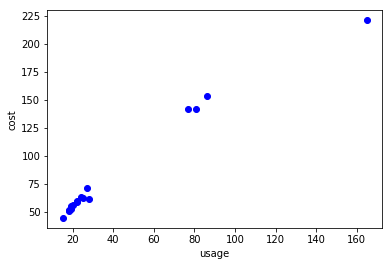

In [3]:
plt.plot(gasusage,gascost,'bo')
plt.xlabel("usage")
plt.ylabel("cost")

In [4]:
reg = LinearRegression().fit(gasusage.reshape(-1,1),gascost)

In [5]:
reg.coef_,reg.intercept_

(array([1.23882035]), 32.33597782831154)

In [6]:
reg.score(gasusage.reshape(-1,1),gascost)

0.9776690757093524

##  由此可知，gas的开支中，每therms的费用为1.24, 每个月的固定费用为32

关于gas消耗量的分析
gas属于明显依赖季节的消耗，冬季的消耗显著高于其他季节，美国东北地区取暖依赖于gas，并且在美国gas取暖在冬天是必须开启的，否则如果出现了管道冻裂，维修起来非常麻烦且昂贵，我记得，在纽约地区，不供暖属于违法？
先计算一下供暖部分的费用，根据过去一年多的gas费用记录，可以看出，非常明显的，有四个月的账单gas费用显著高于其他月份，分别为12月/1月/2月/3月，其中4月账单里有轻微的高出淡季迹象，这与去年纽约地区供暖季节保持一致，那么用旺季减去淡季，可以认为是整个屋子的供暖费用

In [19]:
#费用情况
# 淡季
print("淡季",np.mean(gascost[gascost<75]))
#旺季
print("旺季",np.mean(gascost[gascost>75]))
#由此得出供暖费用如下
print("供暖",np.mean(gascost[gascost>75])-np.mean(gascost[gascost<75]))
# 每年费用估计
print("每年费用估计",np.mean(gascost[gascost<75])*8+np.mean(gascost[gascost>75])*4)

淡季 57.1225
旺季 164.24
供暖 107.1175
每年费用估计 1113.94


In [20]:
#使用情况
# 淡季
print("淡季",np.mean(gasusage[gasusage<30]))
#旺季
print("旺季",np.mean(gasusage[gasusage>30]))
#由此得出供暖费用如下
print("供暖",np.mean(gasusage[gasusage>30])-np.mean(gasusage[gasusage<30]))

淡季 21.416666666666668
旺季 102.25
供暖 80.83333333333333


In [21]:
57-32,164-32

(25, 132)

# 查询美国gas供暖的平均费用，这一部分依赖于房子的结构与面积，以下为摘抄
- 独立屋（独栋）的租户，根据面积和隔热的不同，天然气取暖费从100到400美元的都有。
- $127 last month, standard 1 bedroom in Brooklyn with National Grid supplying gas
- 查询national grid官网，官方统计了每年Residential Heating Bill的消费，以2019年为例，495 for commodity, 1024 for delivery,也就是每年大约是1500元，我们的统计的话，是1114元，考虑到我们的面积低于一个普通的apartment，并且我们应该比美国人有相对来说更加节俭的生活习惯，至少目前，我觉得这个数据还是合理的

# 进一步分析
- 从上述淡季旺季的费用情况和消耗量情况，可以看到，旺季的费用大概是淡季的3倍，但实际上使用量为淡季的5倍，可以很清楚的看出，这个是由于固定费用的存在，根据之前的数据得知，固定费用大概在32元
- 除开32元的固定费用，淡季的费用平均为25元，旺季的费用平均为132元，基本上保证了5倍的关系，由此进一步证实了以上分析

# 综上所述
我个人的理解里，房子的gas费用组成为
1. 固定费用，每个月32元
2. 根据使用量确定的费用，旺季为淡季的5倍，多出来的4倍为整个房子冬天的取暖费用，而剩下的一倍则为厨房做饭消耗

# internet部分
目前使用的是spectrum提供的网络，之前网速为200mbps，经反应网速不佳，故拟定新的解决方案
1. 之前联系过verizon并尝试解决，但这一块地区并没有verizon，所以需要专门搭建网线，后来放弃该方案
2. 10月中旬找华人提供的网络，但出现了网络中断现象，效果不佳
3. 前几天换回了spectrum的网络，至于速度问题，既然大家多次反映网速不佳，如果大家希望有更好的网速，可以升级为400mbps，有赖于大家集体商议

200mbps的网络费用为50元/month，这部分属于固定费用，也即不依赖于用户数的多少